In [ ]:
Q1. What is the mathematical formula for a linear SVM?

In [ ]:
A1. The mathematical formula for a linear support vector machine (SVM) is:
    min w,b (1/2)||w||^2
    s.t. y_(i)(w^T x_(i) + b) >= 1  for i = 1,...,N

In [ ]:
Q2. What is the objective function of a linear SVM?

In [ ]:
A2. The main objective function of a linear SVM is 
        min (1/2)||w||^2
    Where w is the normal vector seperating the hyperplane.
    This objective function tries to minimize the L2 norm of w. Intuitively minimizing w leads to maximising 
    the margin between hyperplane and nearest datapoints from each class.
    Goals are:
        Minimize ||W|| to maximize the margin.
        Ensure that the hyperplane seperates the classes correctly by satisfying the constraints. 
        y_(i)(w^T x_(i) + b) >= 1 for all training samples i
        Find optimal W and B that achieve these goals. 
    
    By minimizing the L2 norm of w, the linear SVM finds the maximum margin hyperplane that seperates the 
    classes with the greatest possible distance between hyperplane and nearest points. This leads to better
    generalization performance.

In [ ]:
Q3. What is the kernel trick in SVM?

In [ ]:
A3. The kernel trick in SVM is a techinique used to efficiently transform a non-linearly seperable classification
    problem into a linear seperable problem. 
    If the data present is not linearly seperable, we can transform it into a higher dimensional feature 
    where it may be linearly seperable. 
    The kernel trick is a efficient mathematical shortcut to get the results of high dimensional transform 
    without actually having to perform the transform.
    It uses a kernel function K(x,y) that computes the inner product between x and y in the transformed space.
    Common kernels are polynomial, Gaussian RBF etc.
    We replace the dot product between points in the SVM math with kernel function and it acts as if we had 
    implicitly transformed the data into higher dimensional space.
    This allows us to efficiently seperate non linear data without ever actually having to compute the high 
    dimensional transformations explicitly.

In [ ]:
Q4. What is the role of support vectors in SVM? Explain with example.

In [ ]:
A4. The support vectors are key training samples that determine the optimal boundary between classes in a 
    SVM. In a SVM, we find the hyperplane that maximizes the margin (distance to nearest points). The 
    training examples that are closest to the maximum margin hyperplane are called support vectors. These 
    points lie on the boundaries of the margin area around the hyperplane.
    EX: We have binary classification dataset with 2 classes, blue circle, red triangle. We train a SVM and 
    find the maximum margin hyperplane which is equidistant from blue circle and red triangle.
    The training points that lie closest to this hyperplane on each side are support vectors. 
    The hyperplane is entirely determined by just these few key support vectors.

In [ ]:
Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

In [ ]:
A5. Hyperplane: 
    The linear decision boundary seperates the two classes. 
    It is defined by the equation wx+b=0 where w is normal to the hyperplane, x is any point on hyperplane, 
    b is bias. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
np.random.seed(0)
x=np.r_[np.random.randn(20,2)-[2,2],np.random.randn(20,2)+[2,2]]
y=[0]*20+[1]*20

In [6]:
clf=SVC(kernel='linear',C=1E10)
clf.fit(x,y)

SVC(C=10000000000.0, kernel='linear')

In [7]:
w=clf.coef_[0]

In [9]:
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

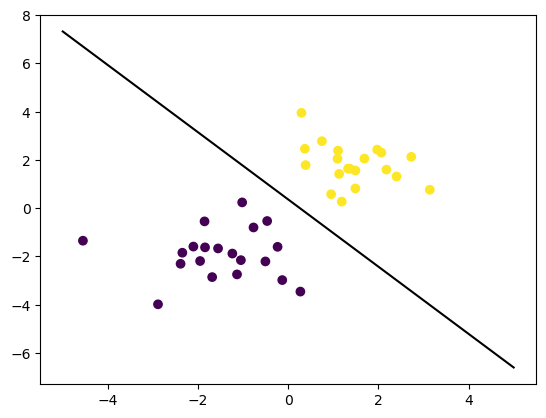

In [10]:
plt.plot(xx,yy,'k-')
plt.scatter(x[:,0],x[:,-1],c=y)
plt.show()

In [ ]:
Marginal hyperplanes:
These are parallel hyperplanes on each side of the decision hyperplane that touch the nearest data points.
The region between these is called the margin.
Maximizing the margin distance improves generalization ability.

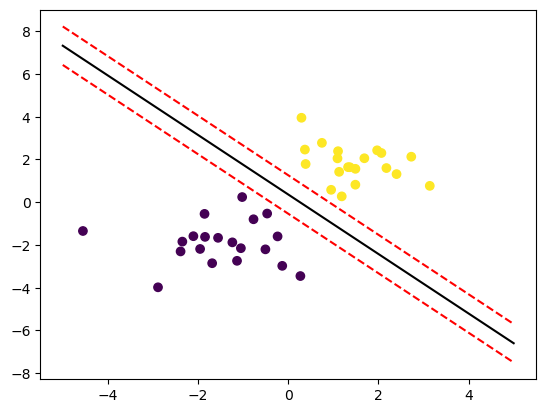

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

np.random.seed(0)
X = np.r_[np.random.randn(20,2) - [2,2], np.random.randn(20,2) + [2,2]]
y = [0]*20 + [1]*20

clf = SVC(kernel='linear', C=1E10) 
clf.fit(X, y)

w = clf.coef_[0]
b = clf.intercept_[0]

xx = np.linspace(-5,5)
yy = -w[0]/w[1] * xx - b/w[1]
plt.plot(xx, yy, 'k-')

margin = 1/np.sqrt(np.sum(clf.coef_ ** 2)) 
yy_down = yy - margin 
yy_up = yy + margin
plt.plot(xx, yy_down, 'r--')
plt.plot(xx, yy_up, 'r--')

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [ ]:
Hard margin SVM:
Requires that all training examples are correctly classified and no points lie in the margin zone.
Finds the maximum margin hyperplane by constraining points as: yi(w⋅xi + b) ≥ 1 for all i

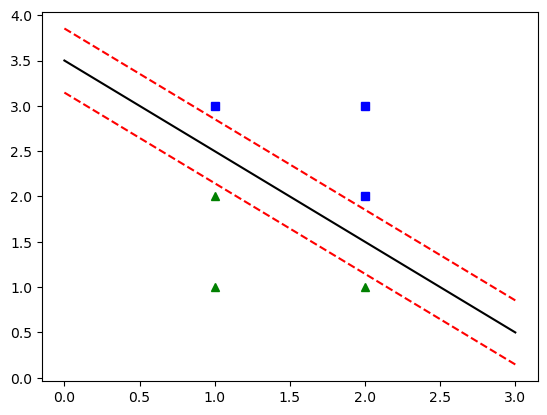

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

x = np.array([[1, 1], [2, 1], [1, 2], [2, 2], [1, 3], [2, 3]])
y = np.array([-1, -1, -1, 1, 1, 1]) 

clf=SVC(kernel='linear',C=1000)
clf.fit(x,y)
w=clf.coef_[0]
b=clf.intercept_[0]
xx=np.linspace(0,3)
yy=-(w[0]*xx+b)/w[1]

plt.plot(xx, yy, 'k-')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs')
plt.plot(X[:,0][y==-1], X[:,1][y==-1], 'g^') 

# Generate margin lines
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - margin
yy_up = yy + margin
plt.plot(xx, yy_down, 'r--')
plt.plot(xx, yy_up, 'r--')

plt.show()

In [ ]:
Soft margin SVM:
Allows some misclassified points, introducing a slack variable ξi.
Optimizes a tradeoff between maximizing the margin and minimizing classification error.
Objective function to minimize is: 1⁄2||w||2 + C∑ξi

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [59]:
x = np.array([[1, 3], [2, 1], [2, 2], [3, 1], [1, 2], [2, 3]])
y = np.array([-1, -1, -1, 1, 1, 1])

In [60]:
clf=SVC(kernel='linear',C=1)

In [61]:
clf.fit(x,y)

SVC(C=1, kernel='linear')

In [62]:
w=clf.coef_[0]
b=clf.intercept_[0]

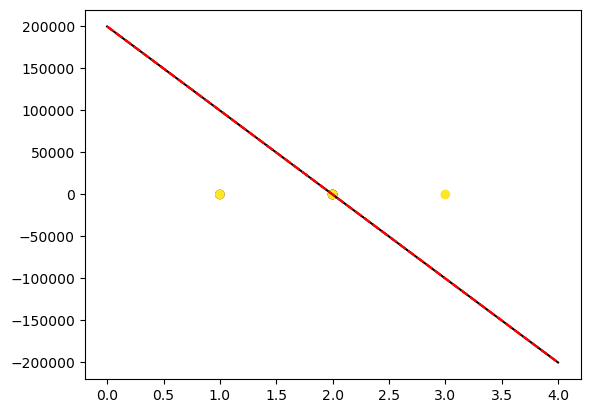

In [63]:
xx=np.linspace(0,4)
yy=-(w[0]*xx+b)/(w[1]+1e-5)
plt.plot(xx,yy,'k-')
plt.scatter(x[:,0],x[:,1],c=y)
margin=1/np.sqrt(np.sum(clf.coef_**2))
yy_down=yy-margin
yy_up=yy+margin
plt.plot(xx,yy_down,'r--')
plt.plot(xx,yy_up,'r--')
plt.show()

In [ ]:
Q6. SVM Implementation through Iris dataset.

~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

In [64]:
from sklearn.datasets import load_iris

In [65]:
import pandas as pd

In [74]:
dataset=load_iris()

In [75]:
x=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [77]:
y=dataset.target

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [79]:
from sklearn.svm import SVC

In [85]:
classifier=SVC(kernel='linear',C=1)

In [86]:
classifier.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [87]:
y_pred=classifier.predict(x_test)

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(y_pred,y_test)

0.9736842105263158

In [92]:
classifier2=SVC(kernel='linear',C=100000000)

In [93]:
classifier2.fit(x_train,y_train)
y_pred2=classifier.predict(x_test)
accuracy_score(y_pred2,y_test)

0.9736842105263158